In [1]:
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess
from lavis.datasets.builders import load_dataset
import random
import time


/media/caduser/da936c0b-edd7-470e-ab92-9b972b220fe7/chau/miniconda3/envs/pitome/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/media/caduser/da936c0b-edd7-470e-ab92-9b972b220fe7/chau/miniconda3/envs/pitome/lib/python3.10/site-packages/fairscale/experimental/nn/offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
/media/caduser/da936c0b-edd7-470e-ab92-9b972b220fe7/chau/miniconda3/envs/pitome/lib/python3.10/site-packages/fairscale/experimental/nn/offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func) 

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", 'base', device=device,is_eval=True)
dataset = load_dataset("coco_retrieval", cfg_path=None)


/media/caduser/da936c0b-edd7-470e-ab92-9b972b220fe7/chau/miniconda3/envs/pitome/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/media/caduser/da936c0b-edd7-470e-ab92-9b972b220fe7/chau/miniconda3/envs/pitome/lib/python3.10/site-packages/lavis/models/base_model.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrar

Using downloaded and verified file: /media/caduser/da936c0b-edd7-470e-ab92-9b972b220fe7/chau/coco/annotations/coco_karpathy_train.json
Using downloaded and verified file: /media/caduser/da936c0b-edd7-470e-ab92-9b972b220fe7/chau/coco/annotations/coco_karpathy_val.json
Using downloaded and verified file: /media/caduser/da936c0b-edd7-470e-ab92-9b972b220fe7/chau/coco/annotations/coco_karpathy_test.json


In [4]:

idx= random.randint(0, len(dataset['train']) - 1)
sample = dataset['train'][idx]
raw_image = sample['image']
caption = sample['text_input']

A lady and a small girl in a room full of things.


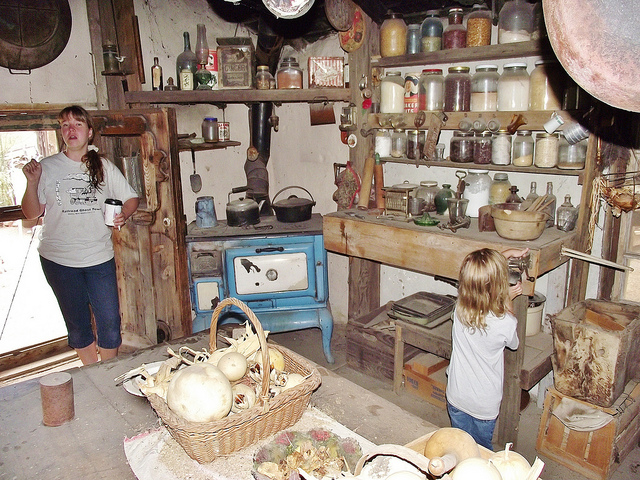

In [5]:
print(caption)
raw_image

In [6]:

img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
txt = text_processors["eval"](caption)

In [ ]:
import time
itm_output = model({"image": img, "text_input": txt}, match_head="itm")
itm_scores = torch.nn.functional.softmax(itm_output, dim=1)
print(f'The image and text are matched with a probability of {itm_scores[:, 1].item():.3%}')

1.2188403606414795
The image and text are matched with a probability of 99.900%


In [ ]:
from algo import (
   pitome,
   tome,
) 
pitome.patch.blip(model.visual_encoder)
model.visual_encoder.ratio = 0.9

using pitome


In [9]:
itm_output = model({"image": img, "text_input": txt}, match_head="itm")
itm_scores = torch.nn.functional.softmax(itm_output, dim=1)
print(f'The image and text are matched with a probability of {itm_scores[:, 1].item():.3%}')

0.048445940017700195
The image and text are matched with a probability of 99.216%
